# Coping with Dimensionality

# Topics

- The Curse of Dimensionality
- Principal Component Analysis
- Singular Value Decomposition
- Latent Dirichlet Analysis

## Where are we?

![is there a 4th dimension?](assets/linear-regression/machine-learning-cheet-sheet.png)

(image: [sas.com](https://www.sas.com/en_us/insights/analytics/machine-learning.html))

# Visualizing data

Humans can't visualize data in more than 3-D

# The Curse of Dimensionality

- As number of dimensions increase, need exponentially more data to create a generalized model

- $d$ dimensions, $v$ target values: $O(v^d)$ examples

# Dimension Reduction

### Objective
"Project" data from high dimensions to lower dimensions

There will be data loss, but should be within acceptable limits

# Techniques to reduce dimensions

- Principal Component Analysis (PCA)
- Singular Value Decomposition (SVD)
- Latent Dirichlet Analysis


# Principal Component Analysis

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

- scikit learn's implementation uses




# Singular Value Decomposition



# Latent Dirichlet Analysis

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

# Workshop - Plotting Data Projections

In this workshop, we will
- Perform 2-dimensional and 3-dimensional PCA projections, using SVD solvers, on a multi-dimensional dataset
- Try Latent Dirichlet Allocation
- Plot and compare the resulting projections

## Dataset - Motion Capture Hand Postures

5 types of hand postures from 12 users were recorded using unlabeled markers on fingers of a glove in a motion capture environment. Due to resolution and occlusion, missing values are common.

https://archive.ics.uci.edu/ml/datasets/Motion+Capture+Hand+Postures

1. Download the data set from the link above
2. Extract into a folder and update `read_csv` to use your path

In [210]:
import pandas as pd

df = pd.read_csv('D:/tmp/Postures/Postures.csv') # update this to your path
df = df.apply(pd.to_numeric, errors='coerce') # convert non-numeric values to NaN
df.head(10)

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,0,55.581184,71.641201,-63.703137,34.850565,81.352041,-54.747443,77.078512,42.548245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,0,34.522824,81.457317,-54.900995,55.827687,71.878788,-63.194368,86.902653,68.312680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,0,61.621550,10.968187,-69.134037,32.678173,81.172874,-56.994362,86.732368,68.308089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,0,61.401356,11.014961,-69.379418,32.527643,81.127660,-57.092473,86.421066,68.405649,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [211]:
# skip the first row, which is all zeros
df = df.iloc[1:]

# randomly sample 5000 points to plot
df = df.sample(n=5000)
print('df.shape:', df.shape)

# split into X and y (ignore User column)
X = df.loc[:, 'X0':]
y = df.loc[:, 'Class']

print('X.shape:', X.shape)
print('y.shape:', y.shape)

df.shape: (5000, 38)
X.shape: (5000, 36)
y.shape: (5000,)


In [212]:
from sklearn.decomposition import PCA

# Run PCA to project into 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X) # will fail

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Exercise - Removing NaNs for PCA

If you try to run PCA directly above, you should see this error:
> Input contains NaN, infinity or a value too large for dtype('float64').

In this exercise:
1. Replace the NaN values using `sklearn.preprocessing.Imputer`: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html
2. Re-run PCA
3. Plot the PCA projection

For step 1, try different imputation strategies ('mean', 'median', 'most_frequent') to see if they make a difference in the plot and `PCA.explained_variance_ratio_`

Note: `sklearn.impute.SimpleImputer` will replace `sklearn.preprocessing.Imputer` in future versions of sklearn.

In [213]:
# impute missing values because PCA can't handle it
# can't just dropna() because some classes will have no coverage
#
# http://scikit-learn.org/dev/auto_examples/plot_missing_values.html

from sklearn.preprocessing import Imputer

# Your code here

imputer = Imputer()
X = imputer.fit_transform(X)


# Re-run PCA after fixing the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print('Before: X.shape', X.shape)
print('After: X.shape', X_pca.shape)

# Percentage of variance explained by the 2 components (higher is better)
print('PCA: explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

Before: X.shape (5000, 36)
After: X.shape (5000, 2)
PCA: explained variance ratio (first two components): [0.1586334  0.08009739]


Plot the PCA projection in 2D.

<IPython.core.display.Javascript object>


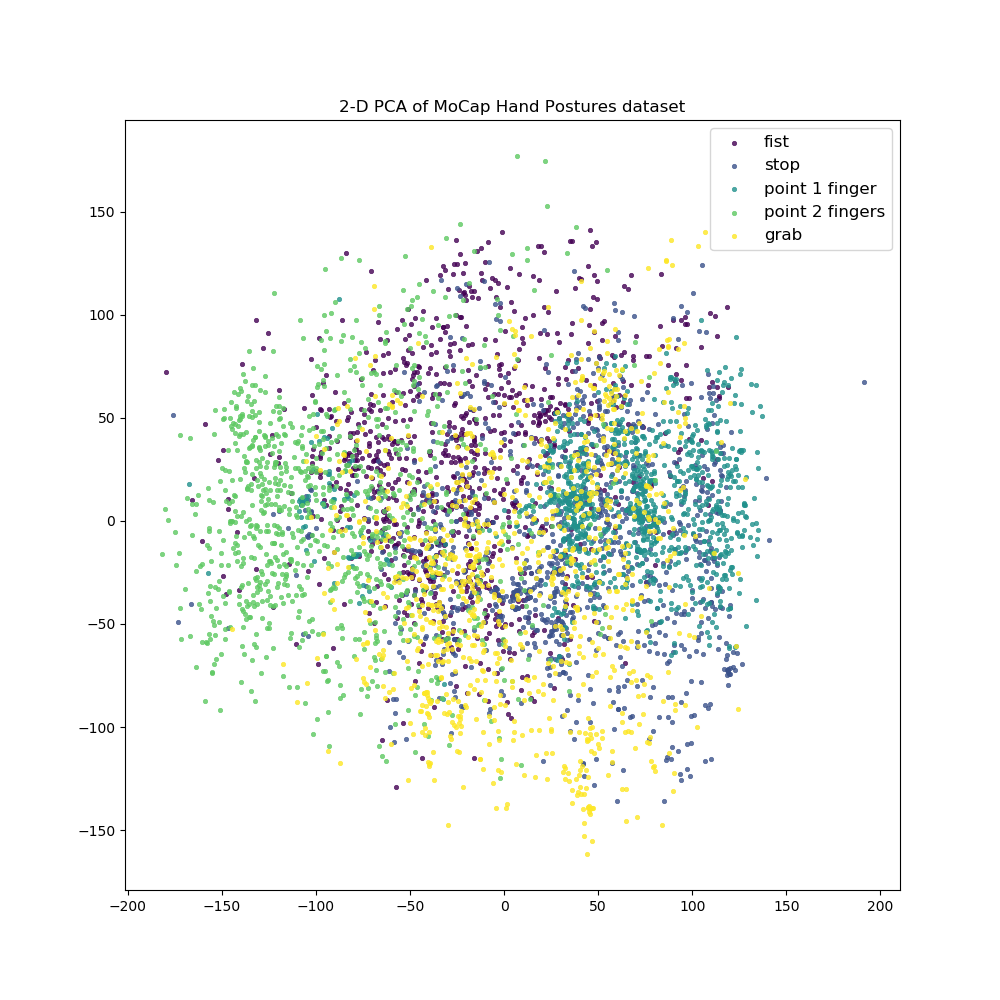

(-201.4854387759737,
 210.44008219610774,
 -179.0464439275053,
 194.41651545686403)

In [215]:
import matplotlib.pyplot as plt
import numpy as np

# target names from the data webpage
target_names = ['fist', 'stop', 'point 1 finger', 'point 2 fingers', 'grab']
n_classes = len(target_names)

fig, ax = plt.subplots(figsize=(10, 10))

# https://matplotlib.org/examples/color/colormaps_reference.html
colors = [plt.cm.viridis(each)
          for each in np.linspace(0, 1, n_classes)]

for color, i, target_name in zip(colors, y.unique(), target_names):
    ax.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8,
               lw=.5, s=10, label=target_name)
ax.legend(loc='upper right', shadow=False, scatterpoints=1, fontsize='large')
ax.set(title='2-D PCA of MoCap Hand Postures dataset')
ax.axis('tight')

## Walkthrough: PCA projection into 3D-space

We can also project the Hand Postures data into 3 components and do a 3-D plot.

Credits: http://scikit-learn.org/dev/auto_examples/decomposition/plot_pca_iris.html

In [218]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

print('Before: X.shape', X.shape)
print('After: X.shape', X_pca_3d.shape)

# Percentage of variance explained by the 3 components (higher is better)
print('PCA: explained variance ratio (first three components): %s'
      % str(pca_3d.explained_variance_ratio_))

Before: X.shape (5000, 36)
After: X.shape (5000, 3)
PCA: explained variance ratio (first three components): [0.1586334  0.08009739 0.06887223]


Plot the PCA projection in 3D.

<IPython.core.display.Javascript object>


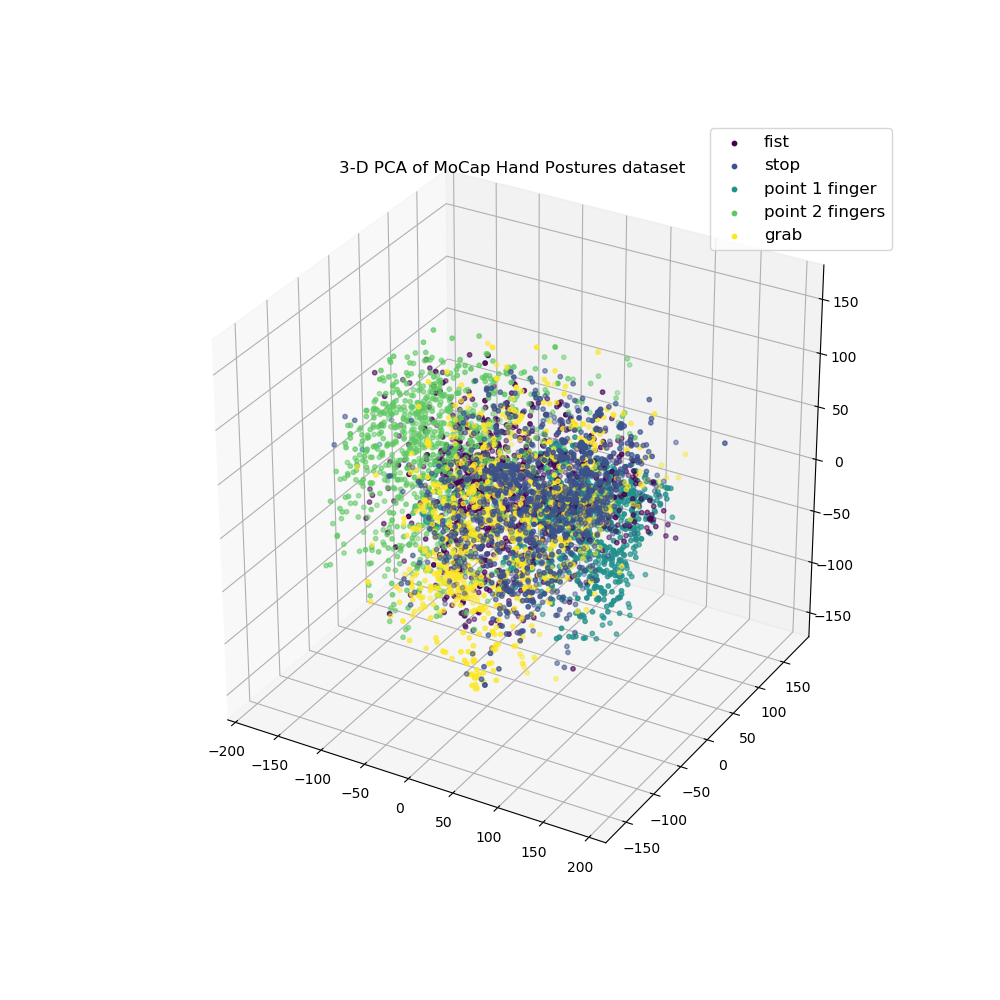

(-200.57702538213618,
 209.6954449358153,
 -178.2715439825041,
 193.71623432723726)

In [219]:
# make the plot interactive, since we're in 3D!
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10, 10))

colors = [plt.cm.viridis(each)
          for each in np.linspace(0, 1, n_classes)]

for color, i, target_name in zip(colors, y.unique(), target_names):
    ax.scatter(X_pca_3d[y == i, 0], X_pca_3d[y == i, 1], X_pca_3d[y == i, 2],
               s=10, color=color, label=target_name)

ax.legend(loc='upper right', shadow=False, scatterpoints=1, fontsize='large')
ax.set(title='3-D PCA of MoCap Hand Postures dataset')
ax.axis('tight')

## Exercise: LDA projection in 3D

Follow the example above, and do a 3D projection with using `sklearn.decomposition.LatentDirichletAllocation`
http://scikit-learn.org/dev/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html 

LDA uses the Bayes algorithm, so it can't accept negative values.
> ValueError: Negative values in data passed to LatentDirichletAllocation.fit

Tasks:
1. Use sklearn.preprocessing.MinMaxScaler to scale the X values to between [0, 1]
2. Apply `sklearn.decomposition.LatentDirichletAllocation` on the scaled X values. 
  - Note: You do not need to call `explained_variance_ratio_` because it doesn't apply to LDA. 
3. Plot the 3-D distribution

In [220]:
# 1. Scale the X values to between [0, 1]
# 2. Apply LDA with 3 components, try either learning_method='online' or learning_method='batch'

# Your code here

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

lda_3d = LatentDirichletAllocation(n_components=3,
                                   learning_method='online')
X_lda_3d = lda_3d.fit_transform(X_scaled)

print('Before: X.shape', X.shape)
print('After: X.shape', X_lda_3d.shape)

# the components
print('LDA: components: %s' % str(lda_3d.components_))

Before: X.shape (5000, 36)
After: X.shape (5000, 3)
LDA: components: [[ 600.84362213  754.08724583  486.37428847  589.0193747   752.92833988
   480.27394119  670.34702219  661.66968582  408.86759407  643.76612904
   682.78984076  382.27644154  673.15828002  569.28231294  377.8074896
   635.72453476  572.74323099  394.53496156  682.31949131  270.32957308
   203.45463758  577.20264815  655.97876813  411.97597428  562.76077201
   582.69601505  421.84123728  532.03652765  640.657214    404.2607387
   596.80057719  589.30207755  380.61574218  514.31081681  514.33293301
   514.26258166]
 [1273.36951743 1152.18312914  653.08507352 1281.64909141 1099.29931888
   603.32481142 1369.46829537 1118.430756    560.13286161 1287.29624654
  1289.74870739  584.46905838 1316.06826471 1192.80546245  712.15502249
  1242.51269938 1294.81606283  831.03398248 1053.03165264 1336.89229457
   829.5323403  1162.73511204 1405.41109774  880.3258196  1144.04198023
  1207.57521647  889.51328214 1098.69712205 1295.252

<IPython.core.display.Javascript object>


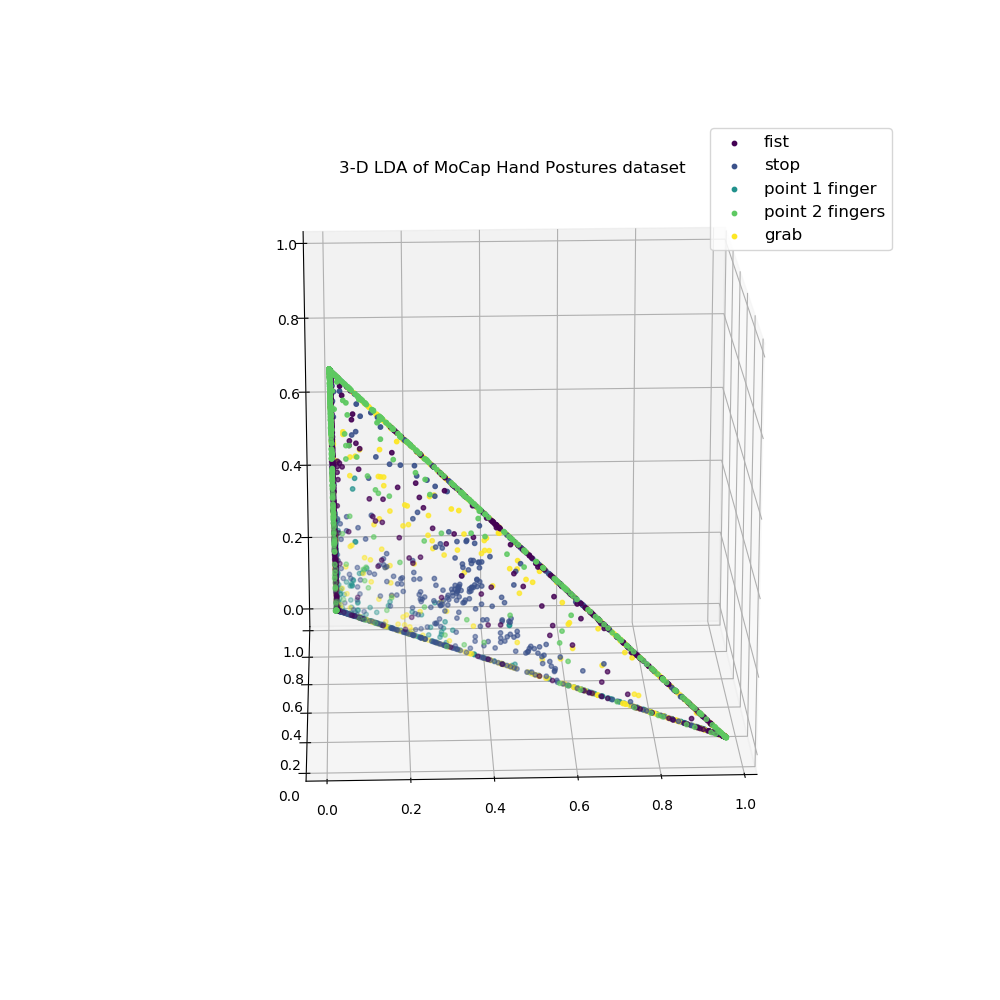

(-0.028563410525143475,
 1.0082605814790162,
 -0.028469380610635798,
 1.0097166273445808)

In [221]:
# 3. Plot the 3D projection
# Your code here

%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10, 10))

colors = [plt.cm.viridis(each)
          for each in np.linspace(0, 1, n_classes)]

for color, i, target_name in zip(colors, y.unique(), target_names):
    ax.scatter(X_lda_3d[y == i, 0], X_lda_3d[y == i, 1], X_lda_3d[y == i, 2],
               s=10, color=color, label=target_name)

ax.legend(loc='upper right', shadow=False, scatterpoints=1, fontsize='large')
ax.set(title='3-D LDA of MoCap Hand Postures dataset')
ax.axis('tight')

# Workshop - Impact of Dimensionality

In this workshop, we will explore whether dimensionality reduction can improve a classification model.

We will:
- Train a Random Forest Clasifier using all 11 features
- Train Random Forest Classifiers with the projections of features into these dimensions:
  - 2-dimensions
  - 5-dimensions
- Compare the performances of all the above models

## Dataset - Wine Quality

Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], [Web Link](http://www3.dsi.uminho.pt/pcortez/wine/)).

https://archive.ics.uci.edu/ml/datasets/Wine+Quality

1. Download the two .csv files from the link above into a folder of your choice
2. Update `read_csv` to use your folder path

In [290]:
import pandas as pd

# we'll use the smaller dataset
df = pd.read_csv('D:/tmp/wine-quality/winequality-red.csv', delimiter=';') # update this to your path
df = df.apply(pd.to_numeric, errors='coerce') # convert non-numeric values to NaN
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [291]:
X = df.loc[:, 'fixed acidity':'alcohol']
y = df.loc[:, 'quality']
print('X.shape:', X.shape)
print('y.shape:', y.shape)

X.shape: (1599, 11)
y.shape: (1599,)


In [308]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=.4)

### Classification model with all 11 dimensions

In [309]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

def TrainRFClassifier(data, labels, test_data, test_labels):
    """Trains a Random Forest classifier, using GridSearchCV to find
    and return the best model
    Args:
        data: the training data
        labels: the labels        
        test_data: the test data
        test_labels: the test labels        
    Returns:
        The best estimator found by GridSearchCV
    """
    gs_rfc = GridSearchCV(RandomForestClassifier(), {'max_depth': [2, 4, 6, 8],
                                                     'n_estimators': [5, 10, 20, 30]})
    gs_rfc.fit(data, labels)

    # select the best estimator
    print('Best score:', gs_rfc.best_score_)
    print('Best parameters:', gs_rfc.best_params_)

    # predict
    pred_labels = gs_rfc.predict(test_data)

    # evaluation metrics
    print(classification_report(test_labels, pred_labels))
    cm = confusion_matrix(test_labels, pred_labels)
    print(cm)
    
    return gs_rfc.best_estimator_

In [310]:
TrainRFClassifier(train_X, train_y, test_X, test_y)

Best score: 0.6152241918665277
Best parameters: {'max_depth': 8, 'n_estimators': 30}
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         5
          4       0.00      0.00      0.00        20
          5       0.70      0.79      0.74       273
          6       0.62      0.69      0.66       255
          7       0.77      0.41      0.54        82
          8       0.00      0.00      0.00         5

avg / total       0.64      0.67      0.65       640

[[  0   0   4   1   0   0]
 [  0   0  12   8   0   0]
 [  0   0 217  54   2   0]
 [  0   1  71 177   6   0]
 [  0   0   7  41  34   0]
 [  0   0   0   3   2   0]]


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Classification model with fewer dimensions

The code below performs PCA projections before fitting the RandomForestClassifier.

In [318]:
dimensions = [2, 3, 5, 7]

for n in dimensions:
    # 1. Run PCA to project X into n-dimension
    # 2. Train the classifier using the projected X training data
    print('========= Projection into %d dimensions =========' % n)
    pca = PCA(n_components=n)

    # As usual, transform both X datasets, but only fit on train_X
    # to avoid contamination by test_X    
    train_X_pca = pca.fit(train_X).transform(train_X)
    test_X_pca = pca.transform(test_X)
    print('PCA explained variance ratio: %s' % str(pca.explained_variance_ratio_))
        
    TrainRFClassifier(train_X_pca, train_y, test_X_pca, test_y)        

========= Projection into 2 dimensions =========
PCA explained variance ratio: [0.94642798 0.04843909]
Best score: 0.5234619395203337
Best parameters: {'max_depth': 8, 'n_estimators': 30}
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         5
          4       0.00      0.00      0.00        20
          5       0.55      0.62      0.58       273
          6       0.48      0.60      0.53       255
          7       0.45      0.11      0.18        82
          8       0.00      0.00      0.00         5

avg / total       0.49      0.51      0.48       640

[[  0   0   2   3   0   0]
 [  0   0  11   6   3   0]
 [  0   0 168 101   4   0]
 [  0   0  99 152   4   0]
 [  0   0  21  52   9   0]
 [  0   0   2   3   0   0]]
========= Projection into 3 dimensions =========
PCA explained variance ratio: [0.94642798 0.04843909 0.00272011]


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Best score: 0.5276329509906152
Best parameters: {'max_depth': 8, 'n_estimators': 20}
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         5
          4       0.20      0.05      0.08        20
          5       0.61      0.65      0.63       273
          6       0.51      0.64      0.57       255
          7       0.63      0.15      0.24        82
          8       0.00      0.00      0.00         5

avg / total       0.55      0.55      0.53       640

[[  0   0   2   3   0   0]
 [  0   1   5  13   1   0]
 [  0   1 178  90   4   0]
 [  0   0  89 164   2   0]
 [  0   3  17  50  12   0]
 [  0   0   2   3   0   0]]
========= Projection into 5 dimensions =========
PCA explained variance ratio: [9.46427976e-01 4.84390863e-02 2.72010671e-03 1.43141917e-03
 9.04125918e-04]


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Best score: 0.6183524504692388
Best parameters: {'max_depth': 8, 'n_estimators': 30}
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         5
          4       0.00      0.00      0.00        20
          5       0.64      0.76      0.70       273
          6       0.56      0.60      0.58       255
          7       0.49      0.24      0.33        82
          8       0.00      0.00      0.00         5

avg / total       0.56      0.60      0.57       640

[[  0   0   5   0   0   0]
 [  0   0  10   9   1   0]
 [  0   1 208  59   5   0]
 [  0   0  90 153  12   0]
 [  0   1  12  48  20   1]
 [  0   0   0   2   3   0]]
========= Projection into 7 dimensions =========
PCA explained variance ratio: [9.46427976e-01 4.84390863e-02 2.72010671e-03 1.43141917e-03
 9.04125918e-04 3.58830117e-05 2.10175722e-05]


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Best score: 0.6204379562043796
Best parameters: {'max_depth': 8, 'n_estimators': 30}
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         5
          4       0.00      0.00      0.00        20
          5       0.67      0.80      0.73       273
          6       0.59      0.65      0.62       255
          7       0.81      0.32      0.46        82
          8       0.00      0.00      0.00         5

avg / total       0.62      0.64      0.61       640

[[  0   0   5   0   0   0]
 [  0   0  12   8   0   0]
 [  0   0 218  55   0   0]
 [  0   0  85 165   5   0]
 [  0   0   7  49  26   0]
 [  0   0   0   4   1   0]]


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In this case, the projections didn't help. Here's a possible reason why:

In [312]:
train_y.value_counts() # not very balanced

5    408
6    383
7    117
4     33
8     13
3      5
Name: quality, dtype: int64

## Exercise: K Nearest Neighbors with Dimensionality Reduction

Since Random Forest has mediocre performance, let's try a different algorithm that may not be as sensitive to an unbalanced dataset.

Your task is to repeat the above with the K-nearest Neighbors classifier. 

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Follow the guides below to fill in the code sections.

In [313]:
from sklearn.neighbors import KNeighborsClassifier

def TrainKNClassifier(data, labels, test_data, test_labels):
    """Trains a K-nearest neighbors classifier, using GridSearchCV to find
    and return the best model
    Args:
        data: the training data
        labels: the labels        
        test_data: the test data
        test_labels: the test labels        
    Returns:
        The best estimator found by GridSearchCV
    """
    gs_knc = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': [4, 8, 10, 12, 15],
                                                   'weights': ['uniform', 'distance']})
    gs_knc.fit(data, labels)

    # select the best estimator
    print('Best score:', gs_knc.best_score_)
    print('Best parameters:', gs_knc.best_params_)

    # predict
    pred_labels = gs_knc.predict(test_data)

    # evaluation metrics
    print(classification_report(test_labels, pred_labels))
    cm = confusion_matrix(test_labels, pred_labels)
    print(cm)
    
    return gs_knc.best_estimator_

In [314]:
# Train a K-nearest neighbors classifier using the
# helper function TrainKNClassifier() on the original training set
# (before any dimensionality reduction)

# Your code here

TrainKNClassifier(train_X, train_y, test_X, test_y)

Best score: 0.5651720542231491
Best parameters: {'n_neighbors': 15, 'weights': 'distance'}
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         5
          4       0.00      0.00      0.00        20
          5       0.64      0.73      0.68       273
          6       0.55      0.63      0.59       255
          7       0.74      0.38      0.50        82
          8       0.00      0.00      0.00         5

avg / total       0.59      0.61      0.59       640

[[  0   0   1   4   0   0]
 [  0   0   9  10   1   0]
 [  0   0 198  75   0   0]
 [  0   0  86 160   9   0]
 [  0   0  12  39  31   0]
 [  0   0   3   1   1   0]]


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='distance')

In [326]:
# Your code here

# For dimensions [2, 3, 5, 7]
# 1. Run PCA to project X into n-dimension
# 2. Train the classifier using the projected X training data

dimensions = [2, 3, 5, 7]

for n in dimensions:
    # 1. Run PCA to project X into n-dimension
    # 2. Train the classifier using the projected X training data
    print('========= Projection into %d dimensions =========' % n)
    pca = PCA(n_components=n)

    # As usual, transform both X datasets, but only fit on train_X
    # to avoid contamination by test_X    
    train_X_pca = pca.fit(train_X).transform(train_X)    
    test_X_pca = pca.transform(test_X)
    print('PCA explained variance ratio: %s' % str(pca.explained_variance_ratio_))

    TrainKNClassifier(train_X_pca, train_y, test_X_pca, test_y)        

========= Projection into 2 dimensions =========
PCA explained variance ratio: [0.94642798 0.04843909]
Best score: 0.5380604796663191
Best parameters: {'n_neighbors': 15, 'weights': 'distance'}
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         5
          4       0.11      0.05      0.07        20
          5       0.63      0.68      0.65       273
          6       0.56      0.58      0.57       255
          7       0.45      0.39      0.42        82
          8       0.00      0.00      0.00         5

avg / total       0.55      0.57      0.56       640

[[  0   0   1   3   1   0]
 [  1   1   6   9   3   0]
 [  1   2 185  69  16   0]
 [  0   1  87 147  19   1]
 [  0   5  15  30  32   0]
 [  0   0   1   4   0   0]]
========= Projection into 3 dimensions =========
PCA explained variance ratio: [0.94642798 0.04843909 0.00272011]
Best score: 0.5318039624608968
Best parameters: {'n_neighbors': 10, 'weights': 'distance'}
           

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Best score: 0.5693430656934306
Best parameters: {'n_neighbors': 15, 'weights': 'distance'}
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         5
          4       0.00      0.00      0.00        20
          5       0.64      0.73      0.68       273
          6       0.55      0.63      0.59       255
          7       0.74      0.38      0.50        82
          8       0.00      0.00      0.00         5

avg / total       0.59      0.61      0.59       640

[[  0   0   1   4   0   0]
 [  0   0   9  10   1   0]
 [  0   0 198  75   0   0]
 [  0   0  86 160   9   0]
 [  0   0  12  39  31   0]
 [  0   0   3   1   1   0]]


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds02\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
